### STOCK MARKET DATA ANALYSIS PROJECT ###

In this notebook, we will discover and explore data from the stock market, 
particularly some technology stocks (Apple, Amazon, Google, and Microsoft).
We will learn how to use yfinance to get stock information, and visualize 
different aspects of it using Seaborn and Matplotlib.
We will look at a few ways of analyzing the risk of a stock, based on its previous performance history.

With our Data Analysis we shall be answering the following questions:

1.) What was the change in price of the different stocks over time?

2.) What was the moving average of the various stocks?

3.) What was the daily return of the various stocks on average?

4.) What was the correlation between different stocks ? 

5.) How much value do we put at risk by investing in a particular stock?

In [ ]:
!pip install -q yfinance

In [3]:
!pip install pandas_datareader

  Obtaining dependency information for pandas_datareader from https://files.pythonhosted.org/packages/3f/16/56c9d648b503619ebe96f726b5f642b68e299b34162ed2d6faa9d7966b7d/pandas_datareader-0.10.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/109.5 kB 262.6 kB/s eta 0:00:01
   --------------------- ----------------- 61.4/109.5 kB 328.2 kB/s eta 0:00:01
   -------------------------------------- 109.5/109.5 kB 488.8 kB/s eta 0:00:00


In [4]:
#Importing dependencies and fetching the stock data from the Yahoo Finance website

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-03-19,174.220001,176.089996,173.520004,175.899994,175.899994,26880900,AMAZON
2024-03-20,176.139999,178.529999,174.639999,178.149994,178.149994,29947200,AMAZON
2024-03-21,179.990005,181.419998,178.149994,178.149994,178.149994,32824300,AMAZON
2024-03-22,177.750000,179.259995,176.750000,178.869995,178.869995,27964100,AMAZON
2024-03-25,178.009995,180.990005,177.240005,179.710007,179.710007,29815500,AMAZON
2024-03-26,180.149994,180.449997,177.949997,178.300003,178.300003,29659000,AMAZON
2024-03-27,179.880005,180.000000,177.309998,179.830002,179.830002,33272600,AMAZON
2024-03-28,180.169998,181.699997,179.259995,180.380005,180.380005,38051600,AMAZON
2024-04-01,180.789993,183.000000,179.949997,180.970001,180.970001,29174500,AMAZON


In [5]:
# Summary Statistics
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,180.812072,182.254104,179.468645,180.954582,180.500497,5.741142e+07
std,9.289194,9.166127,9.225738,9.178730,9.242134,1.723135e+07
min,161.220001,162.029999,159.779999,160.100006,159.249985,2.404830e+07
25%,173.139999,174.345001,171.930000,173.565002,173.105247,4.678545e+07
50%,180.669998,182.229996,178.550003,180.710007,180.238235,5.343900e+07
75%,189.294998,189.990005,187.695000,189.334999,188.909798,6.212460e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


In [8]:
# General information about the data
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-04-03 to 2024-04-02
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


# 1.) What was the change in price of the different stocks over time?

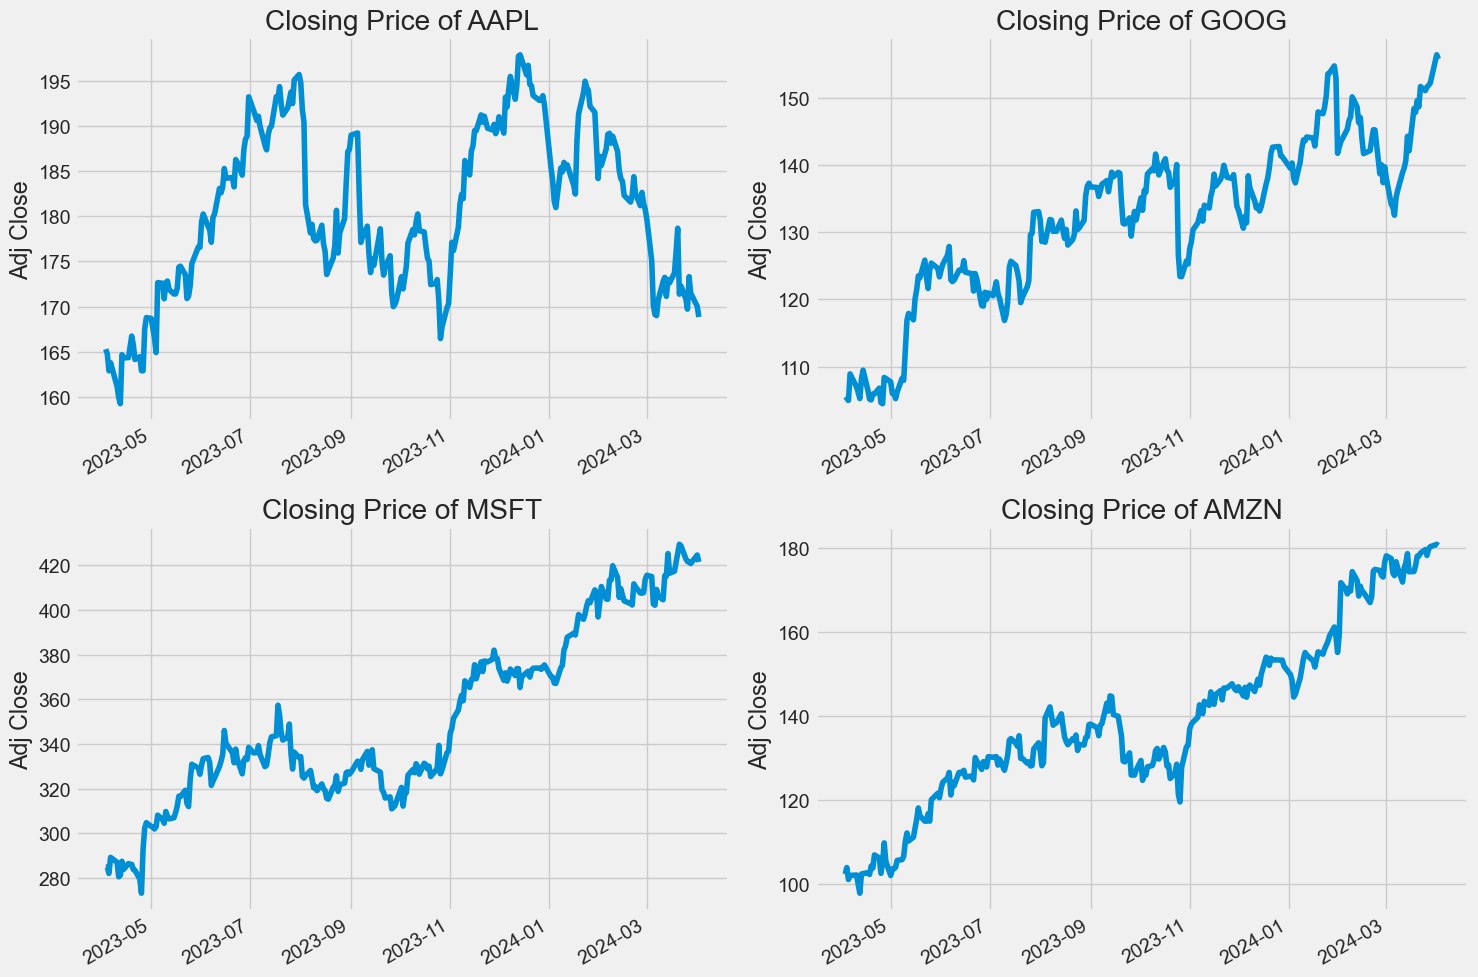

In [9]:
# Historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

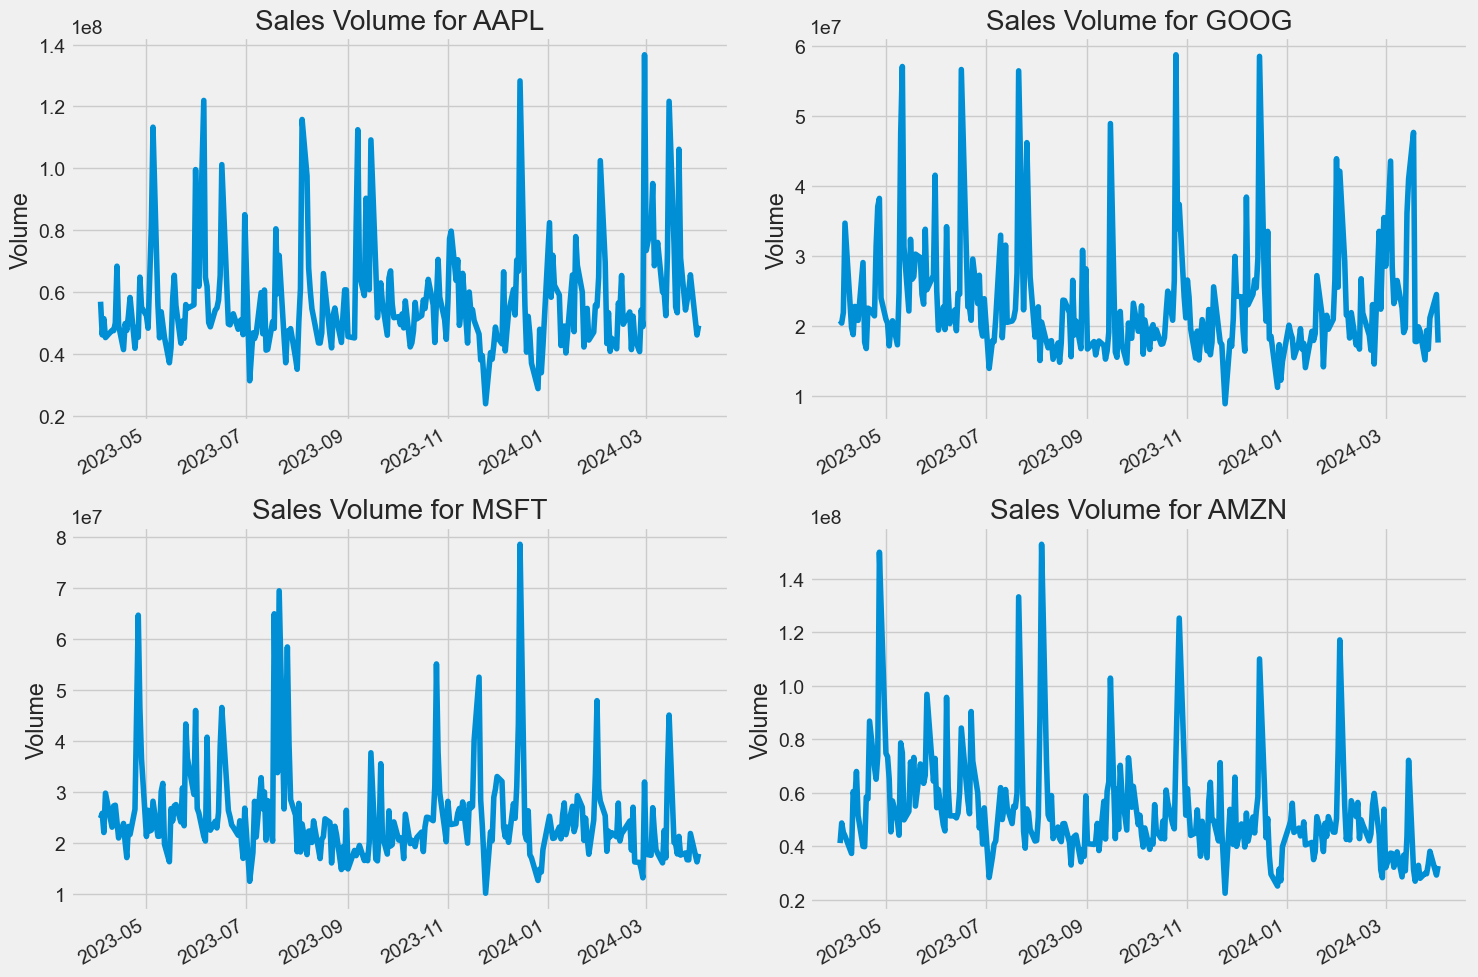

In [10]:
# Plot of the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

# 2.) What was the moving average of the various stocks?

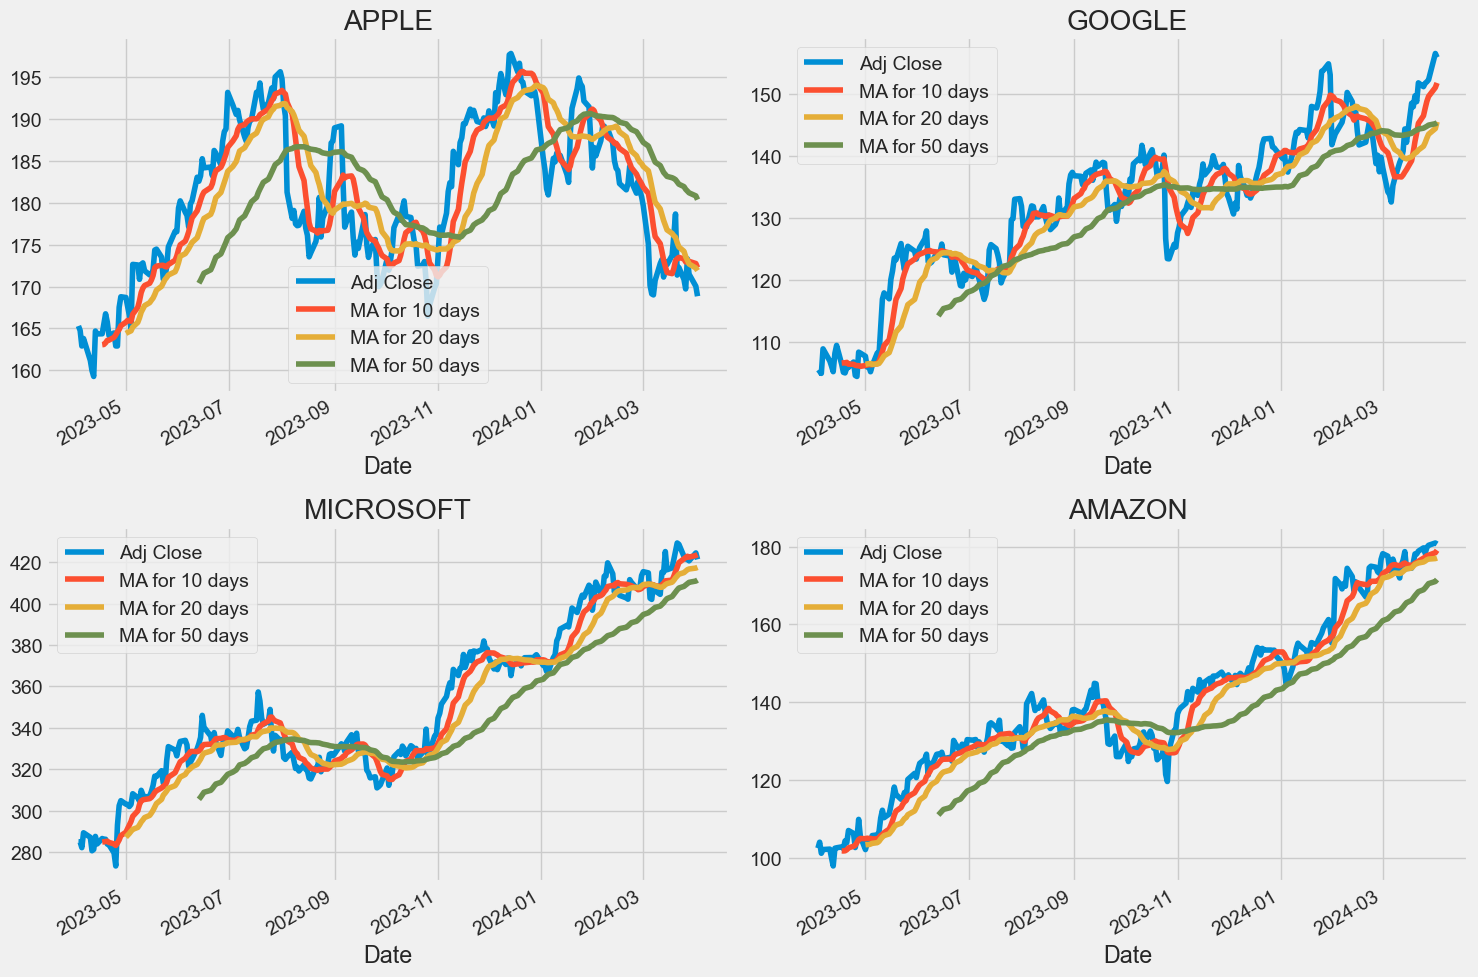

In [11]:
#Moving Average(MA) over 10 days, 20 days, 50 days

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# 3.) What was the daily return of the various stocks on average?

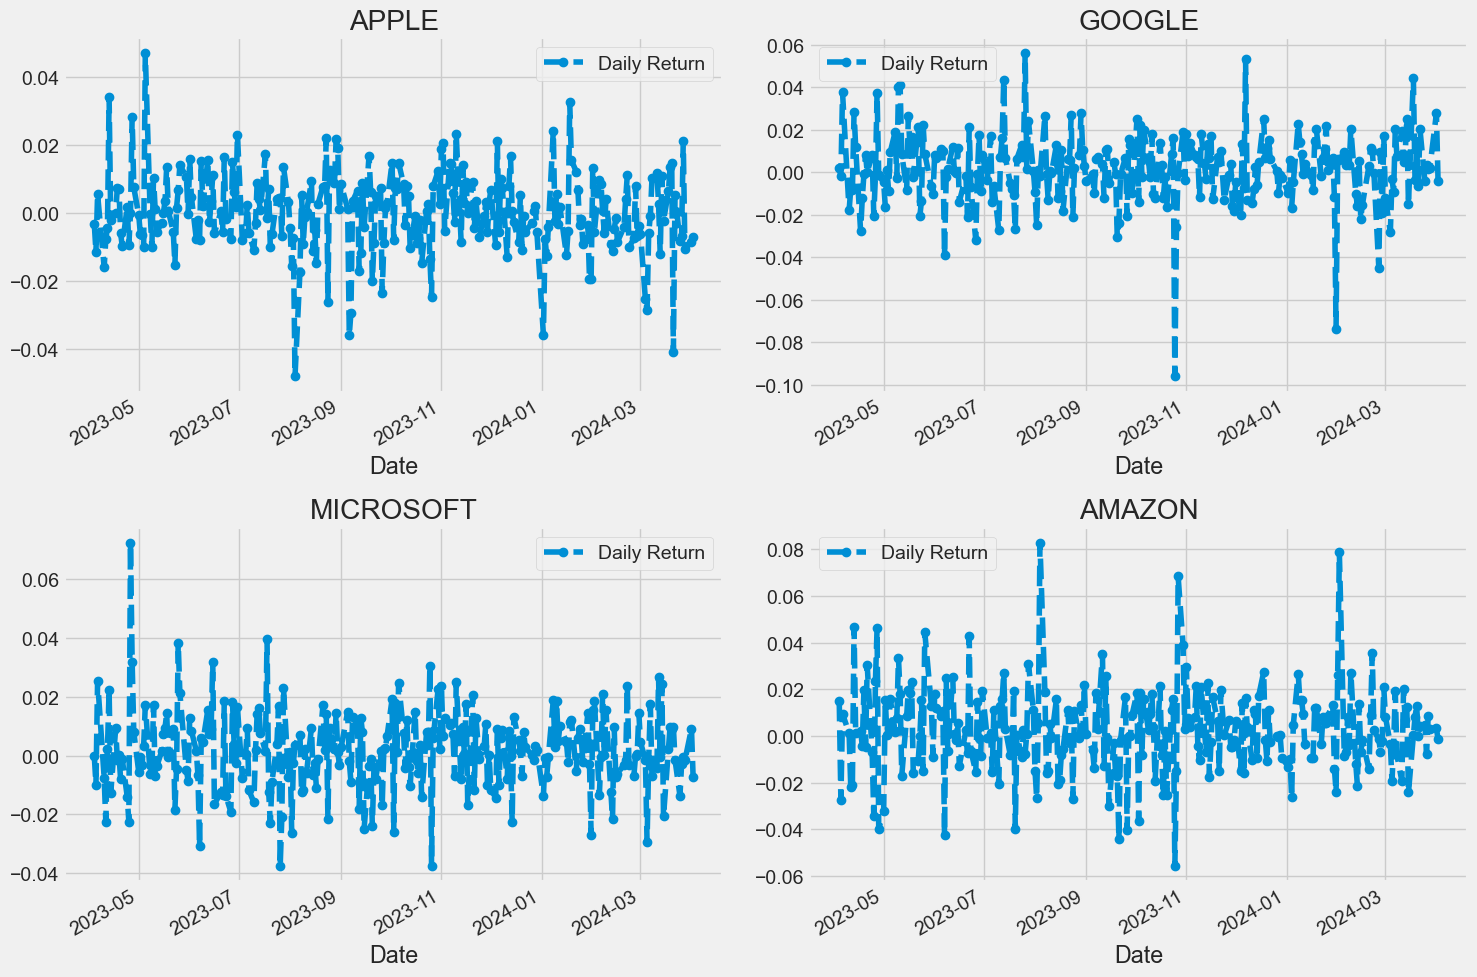

In [12]:
# Using pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

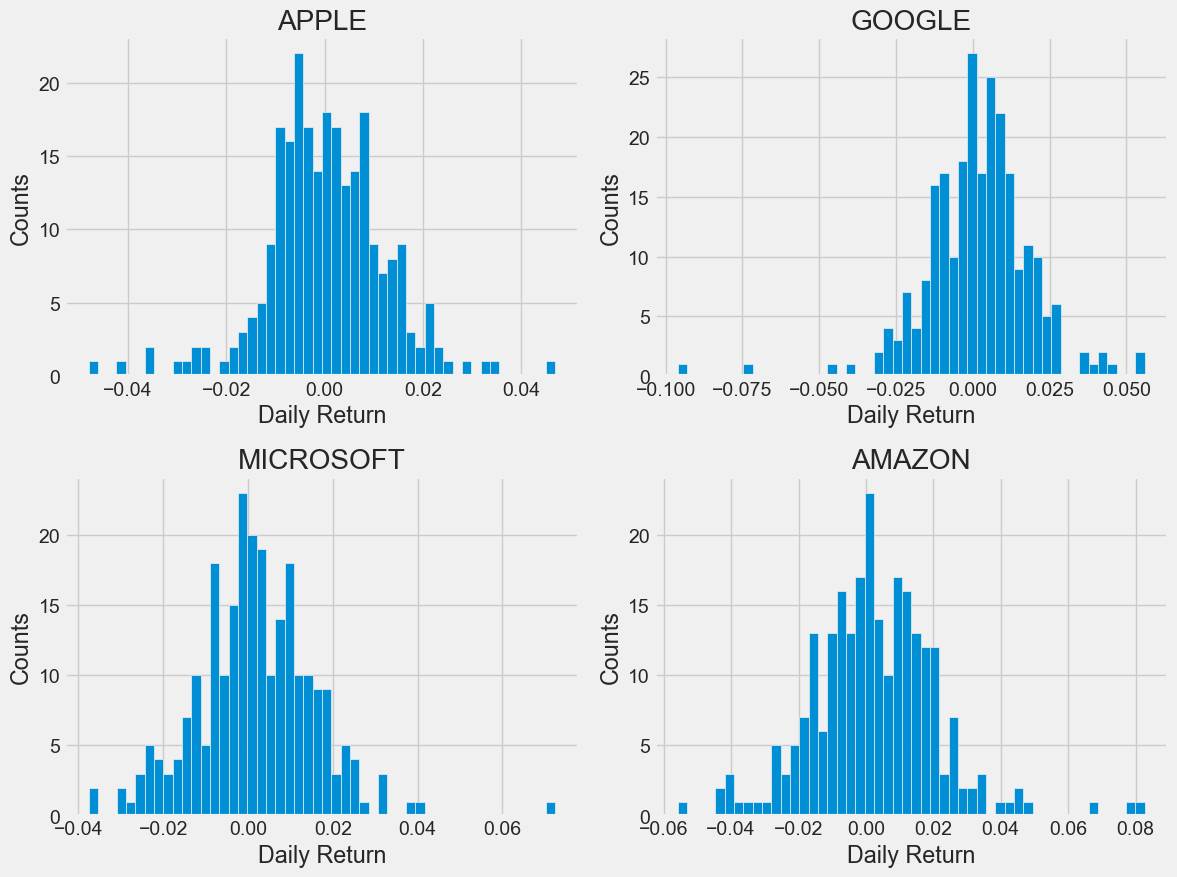

In [13]:
# Average daily return using a histogram
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# 4.) What was the correlation between different stocks ? 

In [14]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-04-03,NaN,NaN,NaN,NaN
2023-04-04,-0.003250,0.015038,0.002002,-0.000174
2023-04-05,-0.011290,-0.027417,-0.001617,-0.009889
2023-04-06,0.005496,0.009496,0.037637,0.025533
2023-04-10,-0.015972,0.001078,-0.017906,-0.007579


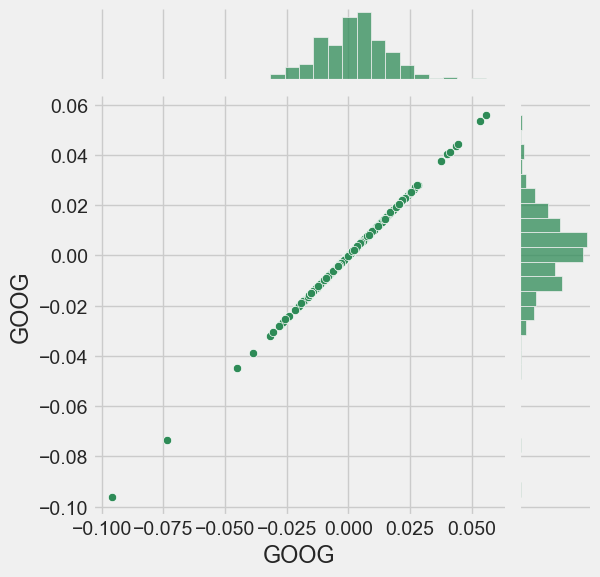

In [15]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')


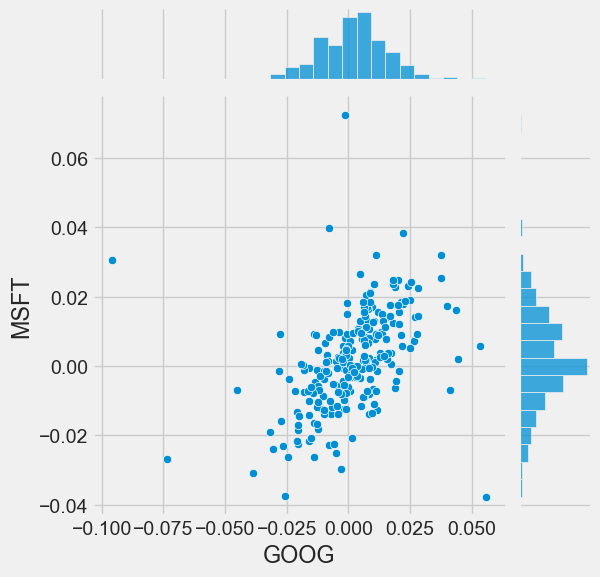

In [16]:
# Joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


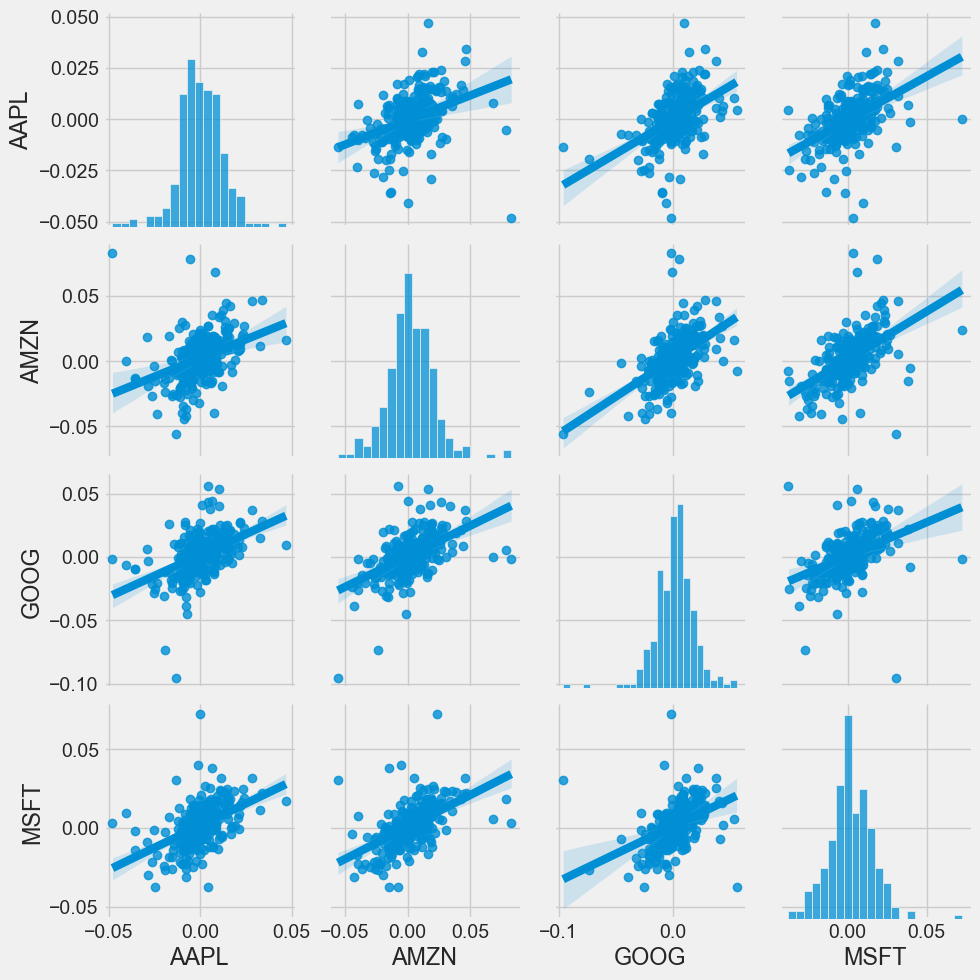

In [17]:
# Calling pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Text(0.5, 1.0, 'Correlation of stock closing price')

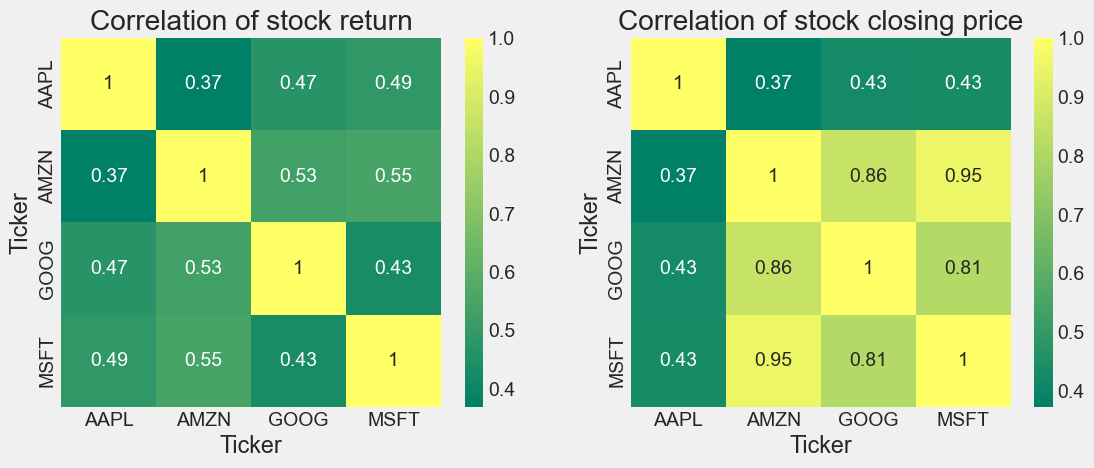

In [18]:
# Correlation plot, to get actual numerical values for the correlation between the stocks' daily return values
# and closing prices
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

# 5.) How much value do we put at risk by investing in a particular stock?

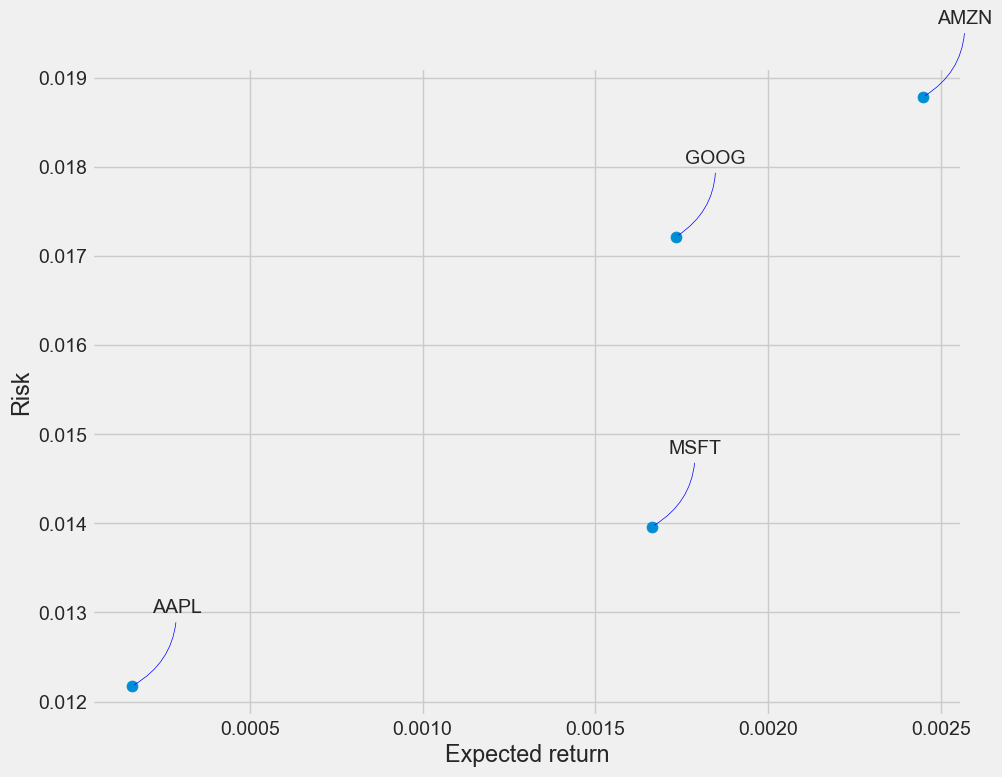

In [19]:
# To quantify risk, one of the most basic ways is by comparing
# the expected return with the standard deviation of the daily returns

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))